## Imports and Data Upload

In [ ]:
import numpy as np
import seaborn as sns
# from PIL import Image

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from matplotlib import image

import os
from os import listdir
import zipfile
from google.colab import drive

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import random
import glob
import shutil

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
batch_size = 32
img_height = 256
img_width = 256

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/MyDrive/GradSchool/DeepLearning/Project/Take2/FacesSplit/Train/',
  image_size=(img_height, img_width),
  batch_size = batch_size)

Found 1248 files belonging to 2 classes.


In [ ]:
valid_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/MyDrive/GradSchool/DeepLearning/Project/Take2/FacesSplit/Val/',
  image_size=(img_height, img_width),
  batch_size = batch_size)

Found 350 files belonging to 2 classes.


In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/MyDrive/GradSchool/DeepLearning/Project/Take2/FacesSplit/Test/',
  image_size=(img_height, img_width),
  batch_size = batch_size)

Found 176 files belonging to 2 classes.


Augemtor 

In [ ]:
data_augmentation= keras.Sequential(
    [
     layers.RandomFlip("horizontal"),
     layers.RandomRotation(0.5),
     layers.RandomZoom(0.2),
     layers.RandomTranslation(height_factor=(-0.1, 0.1), width_factor=(-0.1, 0.1), fill_mode="constant"),
    ])

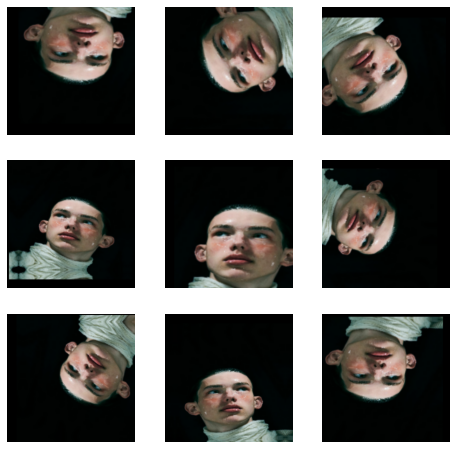

In [ ]:
plt.figure(figsize=(8,8))
for images, _ in train_ds.take(1):
  for i in range(9):
    aug = data_augmentation(images)
    ax= plt.subplot(3,3,i+1)
    plt.imshow(aug[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
#Batchnormalization
inputs = keras.Input(shape=(img_height, img_width, 3))

x0 = data_augmentation(inputs)

x0 = layers.Rescaling(1./255)(inputs)
x0 = layers.BatchNormalization() (x0)
x0 = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x0)
x0 =layers.MaxPooling2D(pool_size=2)(x0)
x0 = layers.BatchNormalization() (x0)
x0 = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x0)
x0 =layers.MaxPooling2D(pool_size=2)(x0)
x0 = layers.Conv2D(filters=4, kernel_size=3, activation="relu")(x0)
x0 =layers.MaxPooling2D(pool_size=2)(x0)
x0 = layers.Conv2D(filters=4, kernel_size=3, activation="relu")(x0)
x0 =layers.Flatten()(x0)
outputs = layers.Dense(1, activation="sigmoid")(x0)
model0 = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
#Dropout
inputs = keras.Input(shape=(img_height, img_width, 3))

x1 = data_augmentation(inputs)

x1 = layers.Rescaling(1./255)(inputs)
x1 = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x1)
x1 = layers.Dropout(rate=0.4)(x1)
x1 =layers.MaxPooling2D(pool_size=2)(x1)
x1 = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x1)
x1 = layers.Dropout(rate=0.4)(x1)
x1 =layers.MaxPooling2D(pool_size=2)(x1)
x1 = layers.Conv2D(filters=4, kernel_size=3, activation="relu")(x1)
x1 =layers.MaxPooling2D(pool_size=2)(x1)
x1 = layers.Conv2D(filters=4, kernel_size=3, activation="relu")(x1)
x1 =layers.Flatten()(x1)
outputs = layers.Dense(1, activation="sigmoid")(x1)
model1 = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
#Batchnormalization and Dropout
inputs = keras.Input(shape=(img_height, img_width, 3))

x2 = data_augmentation(inputs)

x2 = layers.Rescaling(1./255)(inputs)
x2 = layers.BatchNormalization() (x2)
x2 = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x2)
x2 = layers.Dropout(rate=0.4)(x2)
x2 = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x2)
x2 =layers.MaxPooling2D(pool_size=2)(x2)
x2 = layers.Conv2D(filters=4, kernel_size=3, activation="relu")(x2)
x2 =layers.MaxPooling2D(pool_size=2)(x2)
x2 = layers.Conv2D(filters=4, kernel_size=3, activation="relu")(x2)
x2 =layers.Flatten()(x2)
outputs = layers.Dense(1, activation="sigmoid")(x2)
model2 = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
#L1
inputs = keras.Input(shape=(img_height, img_width, 3))

x3 = data_augmentation(inputs)

x3 = layers.Rescaling(1./255)(inputs)
x3 = layers.Conv2D(filters=32, kernel_size=3, kernel_regularizer=regularizers.l1(0.002), activation="relu")(x3)
x3 =layers.MaxPooling2D(pool_size=2)(x3)
x3 = layers.Conv2D(filters=16, kernel_size=3, kernel_regularizer=regularizers.l1(0.002), activation="relu")(x3)
x3 =layers.MaxPooling2D(pool_size=2)(x3)
x3 = layers.Conv2D(filters=4, kernel_size=3, kernel_regularizer=regularizers.l1(0.002), activation="relu")(x3)
x3 =layers.MaxPooling2D(pool_size=2)(x3)
x3 = layers.Conv2D(filters=4, kernel_size=3, kernel_regularizer=regularizers.l1(0.002), activation="relu")(x3)
x3 =layers.Flatten()(x3)
outputs = layers.Dense(1, activation="sigmoid")(x3)
model3 = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
#L2
inputs = keras.Input(shape=(img_height, img_width, 3))

x4 = data_augmentation(inputs)

x4 = layers.Rescaling(1./255)(inputs)
x4 = layers.Conv2D(filters=32, kernel_size=3, kernel_regularizer=regularizers.l2(0.002), activation="relu")(x4)
x4 =layers.MaxPooling2D(pool_size=2)(x4)
x4 = layers.Conv2D(filters=16, kernel_size=3, kernel_regularizer=regularizers.l2(0.002), activation="relu")(x4)
x4 =layers.MaxPooling2D(pool_size=2)(x4)
x4 = layers.Conv2D(filters=4, kernel_size=3, kernel_regularizer=regularizers.l2(0.002), activation="relu")(x4)
x4 =layers.MaxPooling2D(pool_size=2)(x4)
x4 = layers.Conv2D(filters=4, kernel_size=3, kernel_regularizer=regularizers.l2(0.002), activation="relu")(x4)
x4 =layers.Flatten()(x4)
outputs = layers.Dense(1, activation="sigmoid")(x4)
model4 = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
#L1 and L2
inputs = keras.Input(shape=(img_height, img_width, 3))

x5 = data_augmentation(inputs)

x5 = layers.Rescaling(1./255)(inputs)
x5 = layers.Conv2D(filters=32, kernel_size=3, kernel_regularizer=regularizers.l1_l2(l1=0.002, l2=0.002), activation="relu")(x5)
x5 =layers.MaxPooling2D(pool_size=2)(x5)
x5 = layers.Conv2D(filters=16, kernel_size=3, kernel_regularizer=regularizers.l1_l2(l1=0.002, l2=0.002), activation="relu")(x5)
x5 =layers.MaxPooling2D(pool_size=2)(x5)
x5 = layers.Conv2D(filters=4, kernel_size=3, kernel_regularizer=regularizers.l1_l2(l1=0.002, l2=0.002), activation="relu")(x5)
x5 =layers.MaxPooling2D(pool_size=2)(x5)
x5 = layers.Conv2D(filters=4, kernel_size=3, kernel_regularizer=regularizers.l1_l2(l1=0.002, l2=0.002), activation="relu")(x5)
x5 =layers.Flatten()(x5)
outputs = layers.Dense(1, activation="sigmoid")(x5)
model5 = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model0.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model4.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model5.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
filepath0="weights0-improvement-{epoch:02d}-{val_loss:.2f}.hdf5"
filepath1="weights1-improvement-{epoch:02d}-{val_loss:.2f}.hdf5"
filepath2="weights2-improvement-{epoch:02d}-{val_loss:.2f}.hdf5"
filepath3="weights3-improvement-{epoch:02d}-{val_loss:.2f}.hdf5"
filepath4="weights4-improvement-{epoch:02d}-{val_loss:.2f}.hdf5"
filepath5="weights5-improvement-{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint0 = ModelCheckpoint(filepath0, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
checkpoint1 = ModelCheckpoint(filepath1, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
checkpoint2 = ModelCheckpoint(filepath2, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
checkpoint3 = ModelCheckpoint(filepath3, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
checkpoint4 = ModelCheckpoint(filepath4, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
checkpoint5 = ModelCheckpoint(filepath5, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

earlyStop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=32)

In [ ]:
history0 = model0.fit(train_ds, validation_data = valid_ds, epochs = 128, batch_size=16, callbacks=[checkpoint0, earlyStop])
history1 = model1.fit(train_ds, validation_data = valid_ds, epochs = 128, batch_size=16, callbacks=[checkpoint1, earlyStop])
history2 = model2.fit(train_ds, validation_data = valid_ds, epochs = 128, batch_size=16, callbacks=[checkpoint2, earlyStop])
history3 = model3.fit(train_ds, validation_data = valid_ds, epochs = 128, batch_size=16, callbacks=[checkpoint3, earlyStop])
history4 = model4.fit(train_ds, validation_data = valid_ds, epochs = 128, batch_size=16, callbacks=[checkpoint4, earlyStop])
history5 = model5.fit(train_ds, validation_data = valid_ds, epochs = 128, batch_size=16, callbacks=[checkpoint5, earlyStop])

Epoch 1/128
39/39 [==============================] - ETA: 0s - loss: 0.5015 - accuracy: 0.7332
Epoch 1: val_loss improved from inf to 0.67957, saving model to weights0-improvement-01-0.68.hdf5
39/39 [==============================] - 107s 2s/step - loss: 0.5015 - accuracy: 0.7332 - val_loss: 0.6796 - val_accuracy: 0.7571
Epoch 2/128
39/39 [==============================] - ETA: 0s - loss: 0.2876 - accuracy: 0.8878
Epoch 2: val_loss improved from 0.67957 to 0.66362, saving model to weights0-improvement-02-0.66.hdf5
39/39 [==============================] - 23s 506ms/step - loss: 0.2876 - accuracy: 0.8878 - val_loss: 0.6636 - val_accuracy: 0.7657
Epoch 3/128
39/39 [==============================] - ETA: 0s - loss: 0.1729 - accuracy: 0.9263
Epoch 3: val_loss improved from 0.66362 to 0.61085, saving model to weights0-improvement-03-0.61.hdf5
39/39 [==============================] - 23s 512ms/step - loss: 0.1729 - accuracy: 0.9263 - val_loss: 0.6108 - val_accuracy: 0.7714
Epoch 4/128
39/39 [

## Evaluation of Models using Data Augmentation

In [ ]:
def learning_curve (history):
  fig, axs = plt.subplots(1, 2, constrained_layout= True)
  axs[0].set_ylim(-0.1, 1.10)
  axs[1].set_ylim(-0.1, 1.10)
  fig.suptitle('Training Performance')
  axs[0].plot(history.history['accuracy'], label='Training Accuracy') 
  axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
  axs[0].legend()
  axs[0].set_title('Accuracy')
  axs[0].set_ylabel('Accuracy')
  axs[0].set_xlabel('Epoch')

  axs[1].plot(history.history['loss'], label='Training Loss')
  axs[1].plot(history.history['val_loss'], label = 'Validation Loss')
  axs[1].legend()
  axs[1].set_title('Loss')
  axs[1].set_ylabel('Loss')
  axs[1].set_xlabel('Epoch')
  plt.show()

In [ ]:
def model_accuracy (X, Y, model, prediction):
  print("Test Data Results:")
  scores = model.evaluate(X, Y)
  for i in range(len(scores)):
    print("%s: %.3f%%" % (model.metrics_names[i], scores[i]*100))

  accuracy = accuracy_score(Y, prediction.round()) * 100
  precision = precision_score(Y, prediction.round()) * 100
  recall = recall_score(Y, prediction.round()) * 100
  f1score = f1_score(Y, prediction.round())
  
  print("Accuracy Score: %.6s%%" % (accuracy))
  print("Precision Score: %.6s%%" % (precision))
  print("Recall Score: %.6s%%" % (recall))
  print("F1 Score: %.6s" % (f1score))

In [ ]:
#batch size must be the entire test set
X_Length = 176

batch_size = X_Length
img_height = 256
img_width = 256
eval_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/MyDrive/GradSchool/DeepLearning/Project/Take2/FacesSplit/Test/',
  seed=123,
  image_size=(img_height, img_width),
  batch_size = batch_size)

for images, labels in eval_ds.take(1):
  xtest = images.numpy()
  ytest = labels.numpy()
print(ytest.shape)
print(xtest.shape)

Found 176 files belonging to 2 classes.
(176,)
(176, 256, 256, 3)


Model0:
Test Data Results:
6/6 [==============================] - 0s 16ms/step - loss: 0.0745 - accuracy: 0.9830
loss: 7.446%
accuracy: 98.295%
Accuracy Score: 98.295%
Precision Score: 98.4%
Recall Score: 99.193%
F1 Score: 0.9879


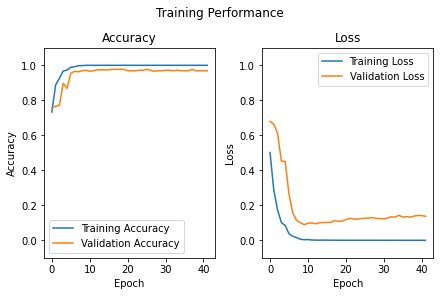

In [ ]:
prediction = model0.predict(xtest)
print("Model0:")
model_accuracy(xtest, ytest, model0, prediction)
learning_curve(history0)

Model1:
Test Data Results:
6/6 [==============================] - 0s 19ms/step - loss: 0.1735 - accuracy: 0.9489
loss: 17.345%
accuracy: 94.886%
Accuracy Score: 94.886%
Precision Score: 95.275%
Recall Score: 97.580%
F1 Score: 0.9641


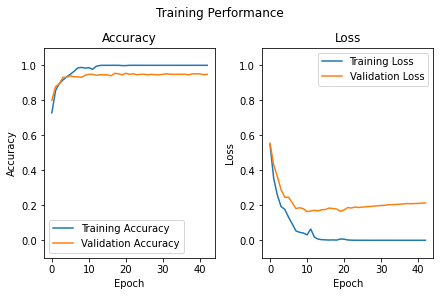

In [ ]:
prediction = model1.predict(xtest)
print("Model1:")
model_accuracy(xtest, ytest, model1, prediction)
learning_curve(history1)

Model2:
Test Data Results:
6/6 [==============================] - 0s 26ms/step - loss: 0.0200 - accuracy: 0.9886
loss: 2.005%
accuracy: 98.864%
Accuracy Score: 98.863%
Precision Score: 99.193%
Recall Score: 99.193%
F1 Score: 0.9919


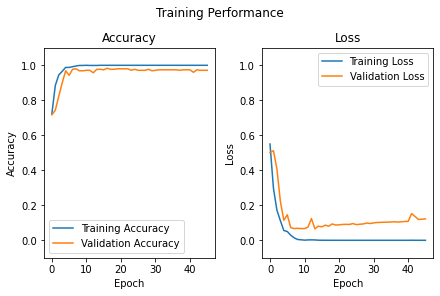

In [ ]:
prediction = model2.predict(xtest)
print("Model2:")
model_accuracy(xtest, ytest, model2, prediction)
learning_curve(history2)

Model3:
Test Data Results:
6/6 [==============================] - 0s 19ms/step - loss: 0.1717 - accuracy: 0.9489
loss: 17.174%
accuracy: 94.886%
Accuracy Score: 94.886%
Precision Score: 94.573%
Recall Score: 98.387%
F1 Score: 0.9644


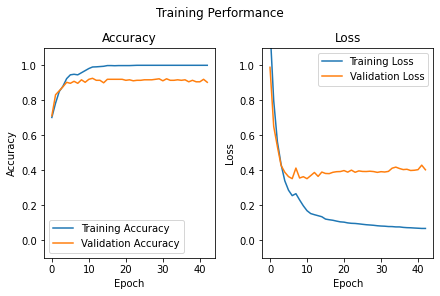

In [ ]:
prediction = model3.predict(xtest)
print("Model3:")
model_accuracy(xtest, ytest, model3, prediction)
learning_curve(history3)

Model4:
Test Data Results:
6/6 [==============================] - 0s 18ms/step - loss: 0.0911 - accuracy: 0.9773
loss: 9.114%
accuracy: 97.727%
Accuracy Score: 97.727%
Precision Score: 98.387%
Recall Score: 98.387%
F1 Score: 0.9838


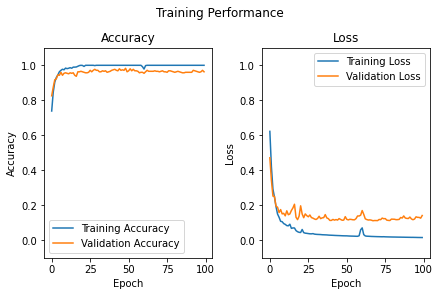

In [ ]:
prediction = model4.predict(xtest)
print("Model4:")
model_accuracy(xtest, ytest, model4, prediction)
learning_curve(history4)

Model5:
Test Data Results:
6/6 [==============================] - 0s 18ms/step - loss: 0.1538 - accuracy: 0.9773
loss: 15.381%
accuracy: 97.727%
Accuracy Score: 97.727%
Precision Score: 97.619%
Recall Score: 99.193%
F1 Score: 0.9840


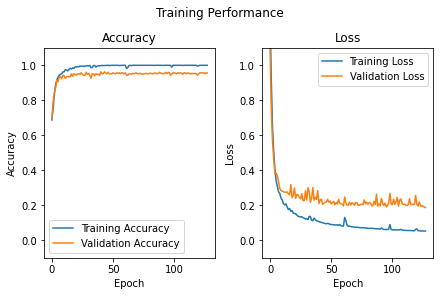

In [ ]:
prediction = model5.predict(xtest)
print("Model5:")
model_accuracy(xtest, ytest, model5, prediction)
learning_curve(history5)

In [ ]:
%%shell
jupyter nbconvert --to html /content/Phase5.ipynb

[NbConvertApp] Converting notebook /content/Phase5.ipynb to html
[NbConvertApp] Writing 840993 bytes to /content/Phase5.html
